In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d, Axes3D
import scipy.optimize as opt
from math import exp as exp
from scipy.optimize import minimize


from sklearn.preprocessing import OneHotEncoder #Label our training Data

%matplotlib inline



#Matplotlib documentation
import matplotlib.transforms as mtransforms

In [2]:
df = pd.read_excel("handwritting.xlsx")
df.insert(1,'ones',1)
df.head()

,Y,ones,1,2,3,4,5,6,7,8,...,391,392,393,394,395,396,397,398,399,400
0,10,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,10,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,10,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,10,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,10,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [102]:
X_draw = df.iloc[:,2:df.shape[1]]
X = df.iloc[:,1:df.shape[1]]
X_draw.head()

,1,2,3,4,5,6,7,8,9,10,...,391,392,393,394,395,396,397,398,399,400
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [103]:
X = np.array(X.values)
X_draw = np.array(X_draw.values)
X_draw

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

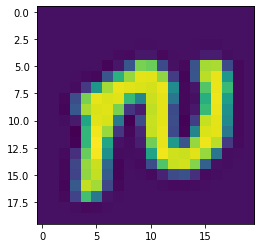

In [104]:
test = X_draw[2832].reshape(20,20)
ax = plt.imshow(test)

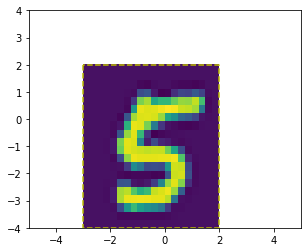

In [105]:
#Obtained from the Matplotlib Documentation
def do_plot(ax, Z, transform):
    im = ax.imshow(Z, interpolation='none',
                   origin='lower',
                   extent=[-2, 4, -3, 2], clip_on=True)

    trans_data = transform + ax.transData
    im.set_transform(trans_data)

    # display intended extent of the image
    x1, x2, y1, y2 = im.get_extent()
    ax.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], "y--",
            transform=trans_data)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-4, 4)


# prepare image and figure
fig,ax1 = plt.subplots(1, 1)
Z = test

# image rotation
do_plot(ax1, Z, mtransforms.Affine2D().rotate_deg(-90))


plt.show()

In [106]:
y = df['Y']

In [107]:
y = np.array(y.values)
y = y.reshape(5000,1)

In [108]:
from scipy.special import expit as sigmoid

#sigmoid = lambda z: 1/(1+np.exp(-z))
#v_sigmoid = np.vectorize(sigmoid)

In [109]:
#This is a set of theta values that have been calculated already
df_t1 = pd.read_excel("Theta1.xlsx")
theta1 = df_t1.to_numpy()

In [110]:
df_t2 = pd.read_excel("Theta2.xlsx")
theta2 = df_t2.to_numpy()

We will now train the neural network to learn these weights

<h2>Cost Function of our Neural Network</h2>
<p><li>We will start by implementing the cost function. For the purpose of verifying that our cost function is working, we will use pre loaded theta values.</li>
<li>These Theta values are the same ones were used previously to perform forward propogation.</li>


</p>



In [111]:
def nnCostFunctionForward(thetas,x,y,lamb):
    m = x.shape[0]
 
    
    thetas1 = thetas[0:10025,].reshape(25,401)
    thetas2 = thetas[10025:10285,].reshape(10,26)
    
    z2 = X @ np.transpose(thetas1)
    a2 = sigmoid(z2) 
    a2 = np.insert(a2, 0, values=1, axis=1)
    z3 = a2 @ np.transpose(thetas2)
    a3 = sigmoid(z3)
    
    theta_reg = sum(sum(np.square(thetas1[:,1:]))) + sum(sum(np.square(thetas2[:,1:])))
    
    J = 1/m * sum(sum(-y*np.log(a3) - (1-y)*np.log(1-a3)))
    J = J + (lamb * (theta_reg)/(2*m))
    
    return J,a3
        

In [112]:
thetas = [theta1,theta2]
thetas = np.concatenate((np.ravel(theta1), np.ravel(theta2)))
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)

From the loaded paramaters and assignment solution, we should get a cost of about 0.387

In [113]:
J,a3 = nnCostFunctionForward(thetas,X,y_onehot,1)
J

0.3837700182363368

In [114]:
def sigmoid_grad(z):
    g = sigmoid(z)
    G = g * (1-g)
    return G
    
sigmoid_grad(0)

0.25

In [115]:
def nnCostFunction(thetas,x,y,lamb):
    m = x.shape[0]
 
    
    thetas1 = thetas[0:10025,].reshape(25,401)
    thetas2 = thetas[10025:10285,].reshape(10,26)
    
    z2 = X @ np.transpose(thetas1) #5000x25
    a2 = sigmoid(z2) #5000x25
    a2 = np.insert(a2, 0, values=1, axis=1) #5000x26
    z3 = a2 @ np.transpose(thetas2) #5000x10
    a3 = sigmoid(z3) #5000x10
    
    theta_reg = sum(sum(np.square(thetas1[:,1:]))) + sum(sum(np.square(thetas2[:,1:])))
    
    J = 1/m * sum(sum(-y*np.log(a3) - (1-y)*np.log(1-a3)))
    J = J + (lamb * (theta_reg)/(2*m))
    
    #Back propogation
    d3 = a3 - y_onehot #(5000x10)
    d2 = (d3@thetas2[:,1:]) * sigmoid_grad(z2) #5000x25
    
    delta1 = np.transpose(d2)@X
    delta2 = np.transpose(d3)@a2
    
    
    grad1 = delta1/m
    grad2 = delta2/m
    
    grad1[:,1:] = grad1[:,1:] + (thetas1[:,1:] * (lamb/m))
    grad2[:,1:] = grad2[:,1:] + (thetas2[:,1:] * (lamb/m))
    
    grad = np.concatenate((np.ravel(grad1),np.ravel(grad2)))
    
   
    
    return J,grad

In [116]:
J,grad = nnCostFunction(thetas,X,y_onehot,1)
J,grad.shape

(0.3837700182363368, (10285,))

In [117]:
theta_r = np.random.uniform(-.12,0.12,[10285,])
J,grad = nnCostFunction(theta_r,X,y_onehot,1)
J,grad.shape

(7.170474574622096, (10285,))

In [118]:
fmin = minimize(fun=nnCostFunction, x0=theta_r, args=(X, y_onehot, 1), method='TNC', jac=True,options={'maxiter': 250})
fmin

     fun: 0.33917315512671853
     jac: array([ 3.96394348e-04,  1.52339343e-07, -2.88695594e-07, ...,
       -7.32106920e-05, -5.39399260e-06, -2.27425309e-05])
 message: 'Max. number of function evaluations reached'
    nfev: 250
     nit: 23
  status: 3
 success: False
       x: array([-3.75445427e-01,  7.61696713e-04, -1.44347797e-03, ...,
       -2.28058625e+00,  4.51364287e-03, -4.08344516e-01])

In [119]:
J,grad = nnCostFunction(fmin.x,X,y_onehot,1)
J,grad.shape

(0.33917315512671853, (10285,))

In [120]:
J,predections = nnCostFunctionForward(fmin.x,X,y_onehot,1)
J,predections.shape

(0.33917315512671853, (5000, 10))

In [121]:
n_predections = np.argmax(predections,axis=1) + 1
n_predections = n_predections.reshape(5000,1)

accuracy2 = (n_predections == y)
np.count_nonzero(accuracy2)/y.size * 100

99.36

<h1>MNIST Data Set</h1>

<p>We can test our Neural Network on the MNIST data set.<p/>
<p>The principle will be the same, the set does however have more pixels.<p/>

In [70]:
mnist = pd.read_csv("mnist_train.csv")
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
ym = mnist['label']
ym = np.array(ym.values)
ym = ym.reshape(ym.size,1)
ym.shape

(60000, 1)

In [123]:
X = mnist.iloc[:,1:mnist.shape[1]]
X = np.array(X.values)
X.shape[0]

60000

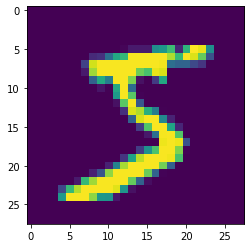

In [124]:
image1 = X[0].reshape(28,28)
ax = plt.imshow(image1)

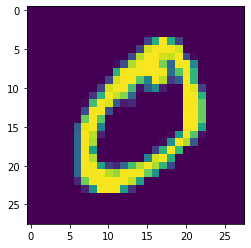

In [125]:
image = X[1].reshape(28,28)
ax = plt.imshow(image)

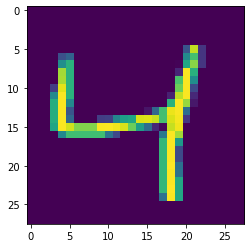

In [126]:
image = X[2].reshape(28,28)
ax = plt.imshow(image)

In [128]:
X = np.insert(X,0,values=1,axis=1)
X.shape

(60000, 785)

<h1>Architecture of network</h1>

<p>Input layer of size 785 (including the bias term) </p>
<p>Hidden layer of size(25)</p>
<p>Output layer has a size of 10</p>


In [190]:
thet1 = np.random.uniform(-.2,0.2,[25,785])
thet1.shape

(25, 785)

In [191]:
thet2 = np.random.uniform(-.2,0.2,[10,26])
thet2.shape

(10, 26)

In [192]:
thet = np.concatenate((np.ravel(thet1),np.ravel(thet2)))
thet.shape

(19885,)

In [129]:
y_onehot2 = encoder.fit_transform(ym)
y_onehot2.shape

(60000, 10)

In [130]:
def make_theta(x,hidden_layer,y,range_r):
    size = (x.shape[1] * hidden_layer ) + ( y.shape[1] * (hidden_layer+1) )
    thetas = np.random.uniform(-range_r,range_r,size)
    return thetas

f = make_theta(X,90,y_onehot2,.2)
f.shape

(71560,)

In [162]:
def nnCostFunction(thetas,x,y,lamb,hidden_layer):
    m = x.shape[0]
     
        
    output_layer = y.shape[1]
    input_layer = x.shape[1]
    
    
    
    #thetas1 = thetas[0:19625,].reshape(25,785,)
    
    thetas1 = thetas[0:(hidden_layer*input_layer),].reshape(hidden_layer,input_layer,)
    
    #thetas2 = thetas[19625:19885,].reshape(10,26)
    
    thetas2 = thetas[(hidden_layer*input_layer):thetas.size,].reshape(y.shape[1],hidden_layer+1)
    
    z2 = x @ np.transpose(thetas1) #10 000x25
    a2 = sigmoid(z2) #10 000x25
    a2 = np.insert(a2, 0, values=1, axis=1) #10 000x26
    z3 = a2 @ np.transpose(thetas2) #10 000x10
    
    a3 = sigmoid(z3) #10 000x10
    
    theta_reg = sum(sum(np.square(thetas1[:,1:]))) + sum(sum(np.square(thetas2[:,1:])))
    
    J = 1/m * sum(sum(-y*np.log(a3) - (1-y)*np.log(1-a3)))
    J = J + (lamb * (theta_reg)/(2*m))
    
    #Back propogation
    d3 = a3 - y #(10 000x10)
    d2 = (d3@thetas2[:,1:]) * sigmoid_grad(z2) #10 000x25
    
    delta1 = np.transpose(d2)@X 
    delta2 = np.transpose(d3)@a2
    
    
    grad1 = delta1/m
    grad2 = delta2/m
    
    grad1[:,1:] = grad1[:,1:] + (thetas1[:,1:] * (lamb/m))
    grad2[:,1:] = grad2[:,1:] + (thetas2[:,1:] * (lamb/m))
    
    grad = np.concatenate((np.ravel(grad1),np.ravel(grad2)))
    
   
    
    return J,grad

In [160]:
def nnCostFunctionForward2(thetas,x,y,lamb,hidden_layer):
    m = x.shape[0]
     
        
    output_layer = y.shape[1]
    input_layer = x.shape[1]
    
    
    
    #thetas1 = thetas[0:19625,].reshape(25,785,)
    
    thetas1 = thetas[0:(hidden_layer*input_layer),].reshape(hidden_layer,input_layer,)
    
    #thetas2 = thetas[19625:19885,].reshape(10,26)
    
    thetas2 = thetas[(hidden_layer*input_layer):thetas.size,].reshape(y.shape[1],hidden_layer+1)
    
    z2 = x @ np.transpose(thetas1) #10 000x25
    a2 = sigmoid(z2) #10 000x25
    a2 = np.insert(a2, 0, values=1, axis=1) #10 000x26
    z3 = a2 @ np.transpose(thetas2) #10 000x10
    
    a3 = sigmoid(z3) #10 000x10
    
    theta_reg = sum(sum(np.square(thetas1[:,1:]))) + sum(sum(np.square(thetas2[:,1:])))
    
    J = 1/m * sum(sum(-y*np.log(a3) - (1-y)*np.log(1-a3)))
    J = J + (lamb * (theta_reg)/(2*m))
        
    return J,a3

In [133]:
J2,grad2 = nnCostFunction(f,X,y_onehot2,1,90)
J2,grad2.shape

(9.556416044298642, (71560,))

In [134]:
fmin = minimize(fun=nnCostFunction, x0=f, args=(X, y_onehot2, 1,90), method='TNC', jac=True,options={'maxiter': 600})
fmin

     fun: 0.34422597457598286
     jac: array([-3.70461233e-06,  2.26014799e-06, -6.15467642e-07, ...,
        1.13617121e-04, -6.99710120e-04, -7.04045200e-04])
 message: 'Max. number of function evaluations reached'
    nfev: 600
     nit: 145
  status: 3
 success: False
       x: array([-0.1766244 ,  0.13560888, -0.03692806, ..., -0.61746821,
       -0.14962899, -0.4097338 ])

In [135]:
J2,predections2 = nnCostFunctionForward2(fmin.x,X,y_onehot2,1,90)
J2,predections2.shape

(0.34422597457598286, (60000, 10))

In [137]:
nn_predections = np.argmax(predections2,axis=1)
nn_predections = nn_predections.reshape(60000,1)

accuracy2 = (nn_predections == ym)
np.count_nonzero(accuracy2)/ym.size * 100

95.23

In [138]:
nn_predections

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=int64)

In [57]:
np.argmax(predections2,axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

With the network trained, we can now see how it performs on the test set

In [139]:
test = pd.read_csv("mnist_test.csv")
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
yt = test['label']
yt = np.array(yt.values)
yt = yt.reshape(yt.size,1)
yt.shape

(10000, 1)

In [151]:
xt = test.iloc[:,1:test.shape[1]]
xt = np.array(xt.values)
xt = np.insert(xt,0,values=1,axis=1)
xt.shape

(10000, 785)

In [153]:
y_ot = encoder.fit_transform(yt)
y_ot.shape

(10000, 10)

In [161]:
J3,predections3 = nnCostFunctionForward2(fmin.x,xt,y_ot,1,90)
J3,predections3.shape

(0.5028874725484149, (10000, 10))

In [165]:
nn_predections = np.argmax(predections3,axis=1)
nn_predections = nn_predections.reshape(10000,1)

accuracy3 = (nn_predections == yt)
np.count_nonzero(accuracy3)/yt.size * 100

93.65